# This notebook demonstrates plotting a single MCS track statistics from Himawari Tb-only tracking demo
- Track produced by: demo_mcs_himawari.sh
- location, size, min Tb, movement speed & direction

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

## Specify track statistics file

In [2]:
rootdir = '/Users/feng045/data/demo/mcs_tbpf/himawari/stats/'
file_name = f'{rootdir}/mcs_tracks_final_20211024.0000_20211025.0000.nc'

In [3]:
# Read in track stats file
ds = xr.open_dataset(file_name)
ds

<xarray.Dataset>
Dimensions:                  (tracks: 39, times: 600, mergers: 50)
Coordinates:
  * tracks                   (tracks) int64 0 1 2 3 4 5 6 ... 33 34 35 36 37 38
  * times                    (times) int64 0 1 2 3 4 5 ... 595 596 597 598 599
  * mergers                  (mergers) int64 0 1 2 3 4 5 6 ... 44 45 46 47 48 49
Data variables: (12/33)
    track_duration           (tracks) int32 ...
    start_status             (tracks) float64 ...
    end_status               (tracks) float64 ...
    start_basetime           (tracks) datetime64[ns] ...
    end_basetime             (tracks) datetime64[ns] ...
    start_split_cloudnumber  (tracks) float64 ...
    ...                       ...
    split_ccs_area           (tracks, times, mergers) float32 ...
    movement_distance        (tracks, times) float32 ...
    movement_speed           (tracks, times) float32 ...
    movement_theta           (tracks, times) float32 ...
    movement_distance_x      (tracks, times) float32 ...
    movement_distance_y      (tracks, times) float32 ...
Attributes:
    Title:                 Statistics of each MCS track
    Institution:           Pacific Northwest National Laboratory
    Contact:               Zhe Feng, zhe.feng@pnnl.gov
    Created_on:            Fri Feb 23 14:18:49 2024
    startdate:             20211024.0000
    enddate:               20211025.0000
    timegap_hour:          3.1
    time_resolution_hour:  1.0
    pixel_radius_km:       5.0
    MCS_duration_hr:       4
    MCS_area_km^2:         40000
    max_speed_thresh:      50

## Select a track for inspection
### Note: track numbers shown in quicklook images are +1 from track indices in the stats file

In [4]:
itrack = 32
iduration = ds.track_duration.isel(tracks=itrack).item()
ilon = ds.meanlon.isel(tracks=itrack)
ilat = ds.meanlat.isel(tracks=itrack)
iradius = np.sqrt(ds.ccs_area.isel(tracks=itrack) / np.pi)
# Convert km to degree (rough conversion at equator)
iradius_deg = iradius / 111.32

## Plot track center location

Text(0.5, 1.0, 'Track 32 center location & diameter proxy')

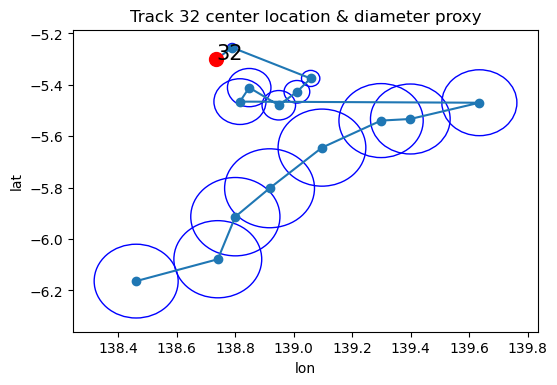

In [7]:
# Scaling factor for radius
scale_rad = 0.1

fig, ax = plt.subplots(1, 1, dpi=100)

# Plot track location
ax.plot(ilon, ilat, '-o')
# Plot track equivalent diameter as circles
for ii in range(iduration):
    center = (ilon.isel(times=ii), ilat.isel(times=ii))
    radius = iradius_deg.isel(times=ii) * scale_rad
    circle = patches.Circle((center), radius, edgecolor='b', facecolor='none')
    ax.add_patch(circle)
# Plot track start location & track number
ax.plot(ilon.isel(times=0), ilat.isel(times=0), color='r', marker='o', markersize=10)
ax.text(ilon.isel(times=0).values, ilat.isel(times=0).values, itrack, fontsize=15)
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_title(f'Track {itrack} center location & diameter proxy')

## Plot track lifecycle statistics

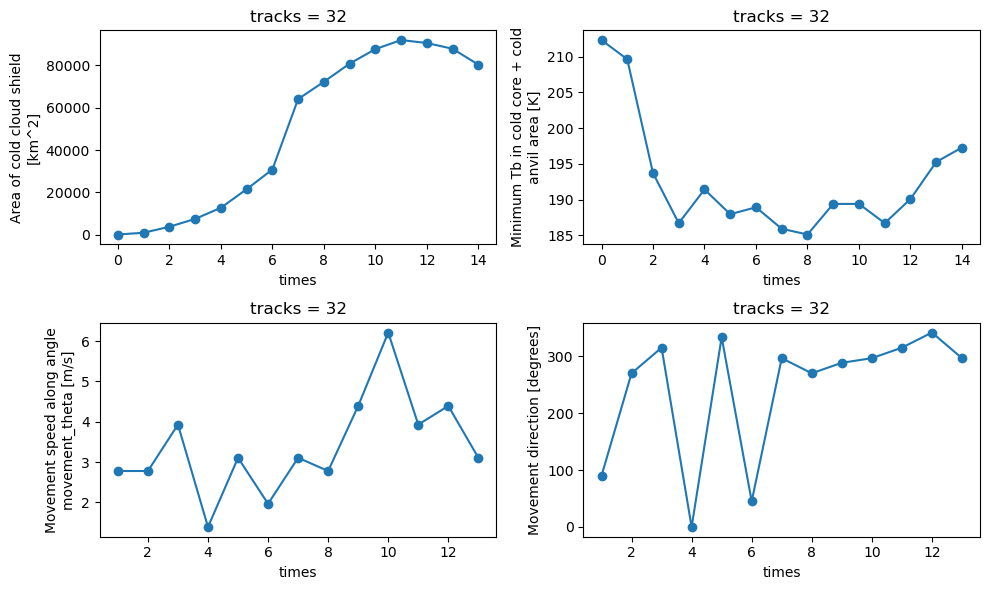

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(10,6), dpi=100)
ds.ccs_area.isel(tracks=itrack).plot(marker='o', ax=axes[0,0])
ds.corecold_mintb.isel(tracks=itrack).plot(marker='o', ax=axes[0,1])
ds.movement_speed.isel(tracks=itrack).plot(marker='o', ax=axes[1,0])
ds.movement_theta.isel(tracks=itrack).plot(marker='o', ax=axes[1,1])
fig.tight_layout()